# Instalasi

In [1]:
!pip install google-play-scraper pandas
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.0 MB/s eta 0:00:00


#Import Library

In [29]:
# =============================
# Data Handling & Utilities
# =============================
import pandas as pd
import numpy as np
import pickle
from collections import Counter
import re
import string

# =============================
# Preprocessing & NLP
# =============================
import nltk
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from wordcloud import WordCloud, STOPWORDS

# =============================
# Visualization
# =============================
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.utils import plot_model  # Opsional, jika butuh visualisasi model

# =============================
# Machine Learning - Traditional
# =============================
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# =============================
# Machine Learning - Deep Learning
# =============================
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping


In [32]:
df = pd.read_csv(
    "/content/data_review.csv",
    usecols=['userName', 'content', 'score', 'at']
).rename(columns={'at': 'date', 'score': 'rating'})


In [33]:
df.head()

,userName,content,rating,date
0,Pengguna Google,"Sejauh ini Alhamdulillah amanah, khususnya har...",5,2025-04-11 14:35:40
1,Pengguna Google,ok,5,2025-04-11 14:35:26
2,Pengguna Google,pelayanan jasa kirim dan kebijakan 0%,1,2025-04-11 14:32:42
3,Pengguna Google,good bgt,5,2025-04-11 14:31:52
4,Pengguna Google,Shopee terpercaya,5,2025-04-11 14:31:51


# Preprocessing Data

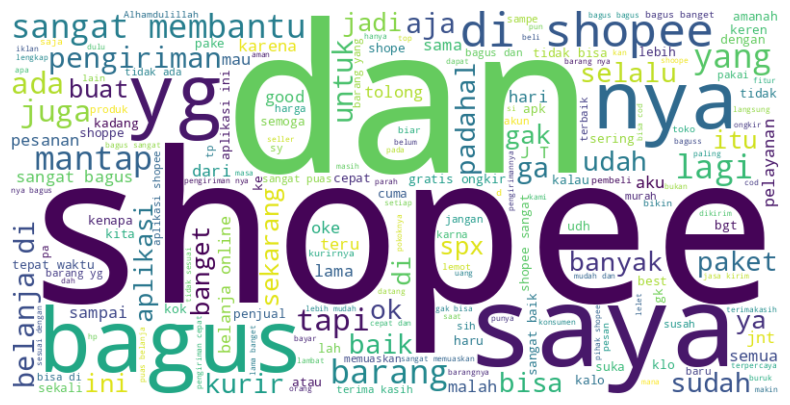

In [34]:
# Gabungkan semua teks dalam kolom 'content'
text = " ".join(df['content'].dropna())  # Hapus NaN jika ada

# Buat Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)

# Tampilkan Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Hilangkan sumbu
plt.show()


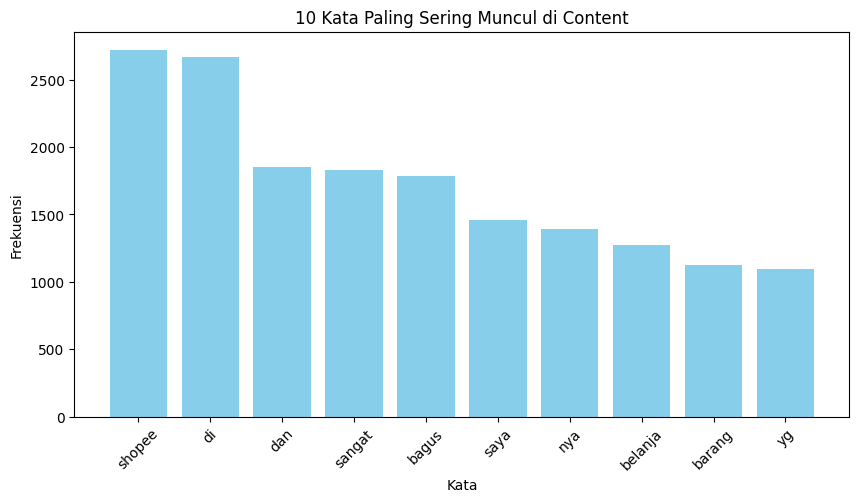

In [35]:
# Gabungkan semua teks dalam kolom 'content'
text = " ".join(df['content'].dropna())  # Gabungkan semua teks & hapus NaN

# Bersihkan teks (hilangkan tanda baca dan ubah ke huruf kecil)
text = re.sub(r"[^\w\s]", "", text.lower())

# Hitung kemunculan kata
word_counts = Counter(text.split())

# Ambil 10 kata paling sering muncul
common_words = word_counts.most_common(10)
words, counts = zip(*common_words)  # Pisahkan kata dan jumlahnya

# Buat diagram batang
plt.figure(figsize=(10, 5))
plt.bar(words, counts, color='skyblue')
plt.xlabel("Kata")
plt.ylabel("Frekuensi")
plt.title("10 Kata Paling Sering Muncul di Content")
plt.xticks(rotation=45)  # Putar label agar lebih mudah dibaca
plt.show()


## 1. Cleaning Data

Pada tahap ini, data dibersihkan dari berbagai karakter yang tidak diperlukan. Berikut beberapa hal yang dihapus:

- **Tanda baca** seperti `!`, `?`, `.`, dan sebagainya  
- **Emoji atau simbol** yang tidak relevan dengan analisis  
- **HTML tags** yang mungkin masih menempel dari hasil scraping  
- **Spasi berlebih** yang dapat mengganggu proses analisis  

### Tujuan:
Mengurangi *noise* dalam data sehingga hasil analisis menjadi lebih akurat dan bersih.


In [36]:
# Fungsi untuk menghapus URL
def remove_URL(tweet):
    if isinstance(tweet, str):
        return re.sub(r'https?://\S+|www\.\S+', '', tweet)
    return tweet

# Fungsi untuk menghapus HTML
def remove_html(tweet):
    if isinstance(tweet, str):
        return re.sub(r'<.*?>', '', tweet)
    return tweet

# Fungsi untuk menghapus emoji
def remove_emoji(tweet):
    if isinstance(tweet, str):
        pattern = re.compile(
            "["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F700-\U0001F77F"  # alchemical symbols
            u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
            u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
            u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
            u"\U0001FA00-\U0001FA6F"  # Chess Symbols
            u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
            u"\U00002702-\U000027B0"  # Additional emoticons
            u"\U0001F1E0-\U0001F1FF"  # flags
            "]+", flags=re.UNICODE
        )
        return pattern.sub('', tweet)
    return tweet

# Fungsi untuk menghapus simbol
def remove_symbols(tweet):
    return re.sub(r'[^a-zA-Z0-9\s]', '', tweet) if isinstance(tweet, str) else tweet

# Fungsi untuk menghapus angka
def remove_numbers(tweet):
    return re.sub(r'\d', '', tweet) if isinstance(tweet, str) else tweet

# Proses pembersihan data
df['cleaning'] = (
    df['content']
    .apply(remove_URL)
    .apply(remove_html)
    .apply(remove_emoji)
    .apply(remove_symbols)
    .apply(remove_numbers)
)

df.head(10)

,userName,content,rating,date,cleaning
0,Pengguna Google,"Sejauh ini Alhamdulillah amanah, khususnya har...",5,2025-04-11 14:35:40,Sejauh ini Alhamdulillah amanah khususnya harg...
1,Pengguna Google,ok,5,2025-04-11 14:35:26,ok
2,Pengguna Google,pelayanan jasa kirim dan kebijakan 0%,1,2025-04-11 14:32:42,pelayanan jasa kirim dan kebijakan
3,Pengguna Google,good bgt,5,2025-04-11 14:31:52,good bgt
4,Pengguna Google,Shopee terpercaya,5,2025-04-11 14:31:51,Shopee terpercaya
5,Pengguna Google,memudahkan,4,2025-04-11 14:31:15,memudahkan
6,Pengguna Google,Tlong aplikasi shopee agar membuat nama&no hp ...,2,2025-04-11 14:30:07,Tlong aplikasi shopee agar membuat namano hp k...
7,Pengguna Google,plis banget ini ma buat shopee yg terhormat to...,5,2025-04-11 14:30:06,plis banget ini ma buat shopee yg terhormat to...
8,Pengguna Google,tolong kenapa ya sebelum di update ongkir nya ...,3,2025-04-11 14:29:24,tolong kenapa ya sebelum di update ongkir nya ...
9,Pengguna Google,MANTAP,5,2025-04-11 14:29:12,MANTAP


## 2. Case Folding

Pada tahap ini, semua huruf dalam teks diubah menjadi huruf kecil (*lowercase*).

### Contoh:
`Bagus` → `bagus`

### Tujuan:
Menyamakan bentuk kata agar tidak dianggap berbeda oleh sistem hanya karena perbedaan huruf besar dan kecil.  
Contoh: `Bagus`, `bagus`, dan `BAGUS` akan dianggap sama setelah case folding.


In [37]:
def case_folding(text):
    return text.lower() if isinstance(text, str) else text

df['case_folding'] = df['cleaning'].apply(case_folding)
df.head(10)

,userName,content,rating,date,cleaning,case_folding
0,Pengguna Google,"Sejauh ini Alhamdulillah amanah, khususnya har...",5,2025-04-11 14:35:40,Sejauh ini Alhamdulillah amanah khususnya harg...,sejauh ini alhamdulillah amanah khususnya harg...
1,Pengguna Google,ok,5,2025-04-11 14:35:26,ok,ok
2,Pengguna Google,pelayanan jasa kirim dan kebijakan 0%,1,2025-04-11 14:32:42,pelayanan jasa kirim dan kebijakan,pelayanan jasa kirim dan kebijakan
3,Pengguna Google,good bgt,5,2025-04-11 14:31:52,good bgt,good bgt
4,Pengguna Google,Shopee terpercaya,5,2025-04-11 14:31:51,Shopee terpercaya,shopee terpercaya
5,Pengguna Google,memudahkan,4,2025-04-11 14:31:15,memudahkan,memudahkan
6,Pengguna Google,Tlong aplikasi shopee agar membuat nama&no hp ...,2,2025-04-11 14:30:07,Tlong aplikasi shopee agar membuat namano hp k...,tlong aplikasi shopee agar membuat namano hp k...
7,Pengguna Google,plis banget ini ma buat shopee yg terhormat to...,5,2025-04-11 14:30:06,plis banget ini ma buat shopee yg terhormat to...,plis banget ini ma buat shopee yg terhormat to...
8,Pengguna Google,tolong kenapa ya sebelum di update ongkir nya ...,3,2025-04-11 14:29:24,tolong kenapa ya sebelum di update ongkir nya ...,tolong kenapa ya sebelum di update ongkir nya ...
9,Pengguna Google,MANTAP,5,2025-04-11 14:29:12,MANTAP,mantap


## 3. Normalisasi Kata

Mengubah kata tidak baku atau singkatan menjadi bentuk kata baku.

### Contoh:
`gk` → `tidak`, `aja` → `saja`

### Catatan:
Biasanya menggunakan kamus normalisasi yang disesuaikan dengan konteks dan bahasa, misalnya kamus khusus Bahasa Indonesia.


In [38]:
def replace_taboo_words(text, kamus_tidak_baku):
    if not isinstance(text, str):
        return '', [], [], []

    replaced_words = []
    kalimat_baku = []
    kata_diganti = []
    kata_tidak_baku_hash = []

    for word in text.split():
        baku = kamus_tidak_baku.get(word)
        if isinstance(baku, str) and baku.isalpha():
            replaced_words.append(baku)
            kalimat_baku.append(baku)
            kata_diganti.append(word)
            kata_tidak_baku_hash.append(hash(word))
        else:
            replaced_words.append(word)

    return ' '.join(replaced_words), kalimat_baku, kata_diganti, kata_tidak_baku_hash


In [39]:
kamus_data = pd.read_excel('/content/kamuskatabaku.xlsx')  # or 'cp1252'
kamus_tidak_baku = dict(zip(kamus_data['tidak_baku'], kamus_data['kata_baku']))

In [40]:
df = pd.DataFrame(df[['date', 'userName', 'rating', 'content', 'cleaning', 'case_folding']])
df.head(5)

,date,userName,rating,content,cleaning,case_folding
0,2025-04-11 14:35:40,Pengguna Google,5,"Sejauh ini Alhamdulillah amanah, khususnya har...",Sejauh ini Alhamdulillah amanah khususnya harg...,sejauh ini alhamdulillah amanah khususnya harg...
1,2025-04-11 14:35:26,Pengguna Google,5,ok,ok,ok
2,2025-04-11 14:32:42,Pengguna Google,1,pelayanan jasa kirim dan kebijakan 0%,pelayanan jasa kirim dan kebijakan,pelayanan jasa kirim dan kebijakan
3,2025-04-11 14:31:52,Pengguna Google,5,good bgt,good bgt,good bgt
4,2025-04-11 14:31:51,Pengguna Google,5,Shopee terpercaya,Shopee terpercaya,shopee terpercaya


In [44]:
df['normalisasi'], df['Kata_Baku'], df['Kata_Tidak_Baku'], df['Kata_Tidak_Baku_Hash'] = zip(*df['case_folding'].apply(lambda x: replace_taboo_words(x, kamus_tidak_baku)))

df = pd.DataFrame(df[['date', 'userName', 'content', 'cleaning', 'case_folding', 'normalisasi']])
df.head(10)

,date,userName,content,cleaning,case_folding,normalisasi
0,2025-04-11 14:35:40,Pengguna Google,"Sejauh ini Alhamdulillah amanah, khususnya har...",Sejauh ini Alhamdulillah amanah khususnya harg...,sejauh ini alhamdulillah amanah khususnya harg...,sejauh ini alhamdulillah amanah khususnya harg...
1,2025-04-11 14:35:26,Pengguna Google,ok,ok,ok,ok
2,2025-04-11 14:32:42,Pengguna Google,pelayanan jasa kirim dan kebijakan 0%,pelayanan jasa kirim dan kebijakan,pelayanan jasa kirim dan kebijakan,pelayanan jasa kirim dan kebijakan
3,2025-04-11 14:31:52,Pengguna Google,good bgt,good bgt,good bgt,good banget
4,2025-04-11 14:31:51,Pengguna Google,Shopee terpercaya,Shopee terpercaya,shopee terpercaya,shopee terpercaya
5,2025-04-11 14:31:15,Pengguna Google,memudahkan,memudahkan,memudahkan,memudahkan
6,2025-04-11 14:30:07,Pengguna Google,Tlong aplikasi shopee agar membuat nama&no hp ...,Tlong aplikasi shopee agar membuat namano hp k...,tlong aplikasi shopee agar membuat namano hp k...,tlong aplikasi shopee agar membuat namano hp k...
7,2025-04-11 14:30:06,Pengguna Google,plis banget ini ma buat shopee yg terhormat to...,plis banget ini ma buat shopee yg terhormat to...,plis banget ini ma buat shopee yg terhormat to...,plis banget ini sama buat shopee yang terhorma...
8,2025-04-11 14:29:24,Pengguna Google,tolong kenapa ya sebelum di update ongkir nya ...,tolong kenapa ya sebelum di update ongkir nya ...,tolong kenapa ya sebelum di update ongkir nya ...,tolong kenapa ya sebelum di update ongkir ya t...
9,2025-04-11 14:29:12,Pengguna Google,MANTAP,MANTAP,mantap,mantap


## 4. Tokenizing

Memisahkan kalimat atau teks menjadi potongan-potongan kata (*token*).

### Contoh:
`Saya suka makan ayam` → [`Saya`, `suka`, `makan`, `ayam`]

### Tujuan:
Membantu sistem mengenali struktur kata dan mempermudah analisis lanjutan.


In [45]:
def tokenize(text):
  tokens = text.split()
  return tokens

df['tokenize'] = df['normalisasi'].apply(tokenize)
df.head(10)

,date,userName,content,cleaning,case_folding,normalisasi,tokenize
0,2025-04-11 14:35:40,Pengguna Google,"Sejauh ini Alhamdulillah amanah, khususnya har...",Sejauh ini Alhamdulillah amanah khususnya harg...,sejauh ini alhamdulillah amanah khususnya harg...,sejauh ini alhamdulillah amanah khususnya harg...,"[sejauh, ini, alhamdulillah, amanah, khususnya..."
1,2025-04-11 14:35:26,Pengguna Google,ok,ok,ok,ok,[ok]
2,2025-04-11 14:32:42,Pengguna Google,pelayanan jasa kirim dan kebijakan 0%,pelayanan jasa kirim dan kebijakan,pelayanan jasa kirim dan kebijakan,pelayanan jasa kirim dan kebijakan,"[pelayanan, jasa, kirim, dan, kebijakan]"
3,2025-04-11 14:31:52,Pengguna Google,good bgt,good bgt,good bgt,good banget,"[good, banget]"
4,2025-04-11 14:31:51,Pengguna Google,Shopee terpercaya,Shopee terpercaya,shopee terpercaya,shopee terpercaya,"[shopee, terpercaya]"
5,2025-04-11 14:31:15,Pengguna Google,memudahkan,memudahkan,memudahkan,memudahkan,[memudahkan]
6,2025-04-11 14:30:07,Pengguna Google,Tlong aplikasi shopee agar membuat nama&no hp ...,Tlong aplikasi shopee agar membuat namano hp k...,tlong aplikasi shopee agar membuat namano hp k...,tlong aplikasi shopee agar membuat namano hp k...,"[tlong, aplikasi, shopee, agar, membuat, naman..."
7,2025-04-11 14:30:06,Pengguna Google,plis banget ini ma buat shopee yg terhormat to...,plis banget ini ma buat shopee yg terhormat to...,plis banget ini ma buat shopee yg terhormat to...,plis banget ini sama buat shopee yang terhorma...,"[plis, banget, ini, sama, buat, shopee, yang, ..."
8,2025-04-11 14:29:24,Pengguna Google,tolong kenapa ya sebelum di update ongkir nya ...,tolong kenapa ya sebelum di update ongkir nya ...,tolong kenapa ya sebelum di update ongkir nya ...,tolong kenapa ya sebelum di update ongkir ya t...,"[tolong, kenapa, ya, sebelum, di, update, ongk..."
9,2025-04-11 14:29:12,Pengguna Google,MANTAP,MANTAP,mantap,mantap,[mantap]


## 5. Stopword Removal / Filtering

Menghapus kata-kata umum yang tidak memiliki makna penting dalam konteks analisis.

### Contoh:
`yang`, `di`, `dan`, `itu`, dll.

### Tujuan:
Mengurangi beban data dan fokus ke kata-kata bermakna yang relevan dengan tujuan analisis.


In [46]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop_words = stopwords.words('indonesian')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [47]:
def remove_stopwords(text):
  return [word for word in text if word not in stop_words]

df['stopword removal'] = df['tokenize'].apply(lambda x: remove_stopwords(x))
df.head(10)

,date,userName,content,cleaning,case_folding,normalisasi,tokenize,stopword removal
0,2025-04-11 14:35:40,Pengguna Google,"Sejauh ini Alhamdulillah amanah, khususnya har...",Sejauh ini Alhamdulillah amanah khususnya harg...,sejauh ini alhamdulillah amanah khususnya harg...,sejauh ini alhamdulillah amanah khususnya harg...,"[sejauh, ini, alhamdulillah, amanah, khususnya...","[alhamdulillah, amanah, harga, barang, sesuai,..."
1,2025-04-11 14:35:26,Pengguna Google,ok,ok,ok,ok,[ok],[ok]
2,2025-04-11 14:32:42,Pengguna Google,pelayanan jasa kirim dan kebijakan 0%,pelayanan jasa kirim dan kebijakan,pelayanan jasa kirim dan kebijakan,pelayanan jasa kirim dan kebijakan,"[pelayanan, jasa, kirim, dan, kebijakan]","[pelayanan, jasa, kirim, kebijakan]"
3,2025-04-11 14:31:52,Pengguna Google,good bgt,good bgt,good bgt,good banget,"[good, banget]","[good, banget]"
4,2025-04-11 14:31:51,Pengguna Google,Shopee terpercaya,Shopee terpercaya,shopee terpercaya,shopee terpercaya,"[shopee, terpercaya]","[shopee, terpercaya]"
5,2025-04-11 14:31:15,Pengguna Google,memudahkan,memudahkan,memudahkan,memudahkan,[memudahkan],[memudahkan]
6,2025-04-11 14:30:07,Pengguna Google,Tlong aplikasi shopee agar membuat nama&no hp ...,Tlong aplikasi shopee agar membuat namano hp k...,tlong aplikasi shopee agar membuat namano hp k...,tlong aplikasi shopee agar membuat namano hp k...,"[tlong, aplikasi, shopee, agar, membuat, naman...","[tlong, aplikasi, shopee, namano, hp, kurir, p..."
7,2025-04-11 14:30:06,Pengguna Google,plis banget ini ma buat shopee yg terhormat to...,plis banget ini ma buat shopee yg terhormat to...,plis banget ini ma buat shopee yg terhormat to...,plis banget ini sama buat shopee yang terhorma...,"[plis, banget, ini, sama, buat, shopee, yang, ...","[plis, banget, shopee, terhormat, tolong, pesa..."
8,2025-04-11 14:29:24,Pengguna Google,tolong kenapa ya sebelum di update ongkir nya ...,tolong kenapa ya sebelum di update ongkir nya ...,tolong kenapa ya sebelum di update ongkir nya ...,tolong kenapa ya sebelum di update ongkir ya t...,"[tolong, kenapa, ya, sebelum, di, update, ongk...","[tolong, ya, update, ongkir, ya, kadang, free,..."
9,2025-04-11 14:29:12,Pengguna Google,MANTAP,MANTAP,mantap,mantap,[mantap],[mantap]


## 6. Stemming

Mengubah kata ke bentuk dasarnya.

### Contoh:
`berlari`, `lari-lari`, `pelari` → `lari`

### Catatan:
Untuk Bahasa Indonesia, proses stemming biasanya menggunakan algoritma seperti **Nazief & Adriani** atau library seperti **Sastrawi**.


In [48]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stem_text(text):
  return [stemmer.stem(word) for word in text]

df['steming_data'] = df['stopword removal'].apply(lambda x: ' '.join(stem_text(x)))
df.head(10)

,date,userName,content,cleaning,case_folding,normalisasi,tokenize,stopword removal,steming_data
0,2025-04-11 14:35:40,Pengguna Google,"Sejauh ini Alhamdulillah amanah, khususnya har...",Sejauh ini Alhamdulillah amanah khususnya harg...,sejauh ini alhamdulillah amanah khususnya harg...,sejauh ini alhamdulillah amanah khususnya harg...,"[sejauh, ini, alhamdulillah, amanah, khususnya...","[alhamdulillah, amanah, harga, barang, sesuai,...",alhamdulillah amanah harga barang sesuai kwali...
1,2025-04-11 14:35:26,Pengguna Google,ok,ok,ok,ok,[ok],[ok],ok
2,2025-04-11 14:32:42,Pengguna Google,pelayanan jasa kirim dan kebijakan 0%,pelayanan jasa kirim dan kebijakan,pelayanan jasa kirim dan kebijakan,pelayanan jasa kirim dan kebijakan,"[pelayanan, jasa, kirim, dan, kebijakan]","[pelayanan, jasa, kirim, kebijakan]",layan jasa kirim bijak
3,2025-04-11 14:31:52,Pengguna Google,good bgt,good bgt,good bgt,good banget,"[good, banget]","[good, banget]",good banget
4,2025-04-11 14:31:51,Pengguna Google,Shopee terpercaya,Shopee terpercaya,shopee terpercaya,shopee terpercaya,"[shopee, terpercaya]","[shopee, terpercaya]",shopee percaya
5,2025-04-11 14:31:15,Pengguna Google,memudahkan,memudahkan,memudahkan,memudahkan,[memudahkan],[memudahkan],mudah
6,2025-04-11 14:30:07,Pengguna Google,Tlong aplikasi shopee agar membuat nama&no hp ...,Tlong aplikasi shopee agar membuat namano hp k...,tlong aplikasi shopee agar membuat namano hp k...,tlong aplikasi shopee agar membuat namano hp k...,"[tlong, aplikasi, shopee, agar, membuat, naman...","[tlong, aplikasi, shopee, namano, hp, kurir, p...",tlong aplikasi shopee namano hp kurir antar ti...
7,2025-04-11 14:30:06,Pengguna Google,plis banget ini ma buat shopee yg terhormat to...,plis banget ini ma buat shopee yg terhormat to...,plis banget ini ma buat shopee yg terhormat to...,plis banget ini sama buat shopee yang terhorma...,"[plis, banget, ini, sama, buat, shopee, yang, ...","[plis, banget, shopee, terhormat, tolong, pesa...",plis banget shopee hormat tolong pesan custome...
8,2025-04-11 14:29:24,Pengguna Google,tolong kenapa ya sebelum di update ongkir nya ...,tolong kenapa ya sebelum di update ongkir nya ...,tolong kenapa ya sebelum di update ongkir nya ...,tolong kenapa ya sebelum di update ongkir ya t...,"[tolong, kenapa, ya, sebelum, di, update, ongk...","[tolong, ya, update, ongkir, ya, kadang, free,...",tolong ya update ongkir ya kadang free ongkirt...
9,2025-04-11 14:29:12,Pengguna Google,MANTAP,MANTAP,mantap,mantap,[mantap],[mantap],mantap


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   date              12000 non-null  object
 1   userName          12000 non-null  object
 2   content           12000 non-null  object
 3   cleaning          12000 non-null  object
 4   case_folding      12000 non-null  object
 5   normalisasi       12000 non-null  object
 6   tokenize          12000 non-null  object
 7   stopword removal  12000 non-null  object
 8   steming_data      12000 non-null  object
dtypes: object(9)
memory usage: 843.9+ KB


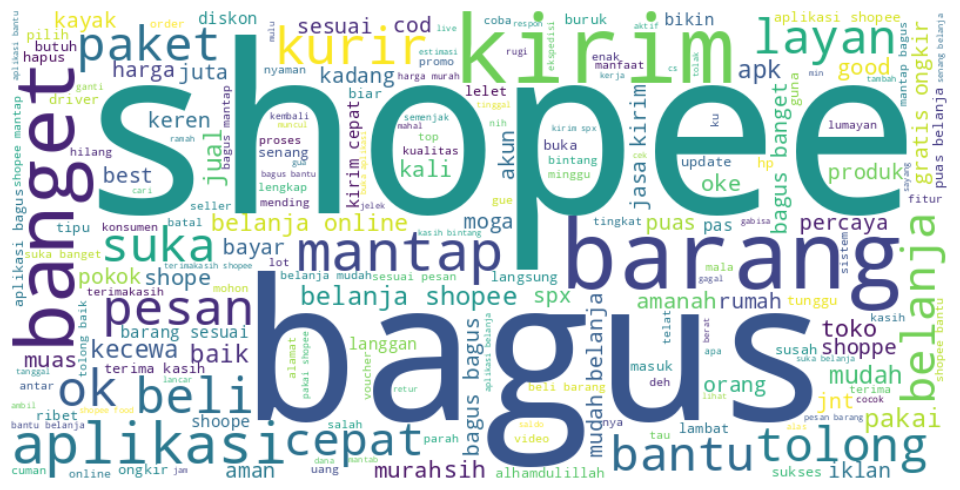

In [50]:
# Gabungkan semua teks dalam kolom 'steming_data', abaikan NaN
text = " ".join(df['steming_data'].dropna().astype(str))

# Buat daftar stopwords tambahan
stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', 'amp', 'ya'])

# Buat dan generate Word Cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis',
    stopwords=stopwords
).generate(text)

# Tampilkan Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout()
plt.show()


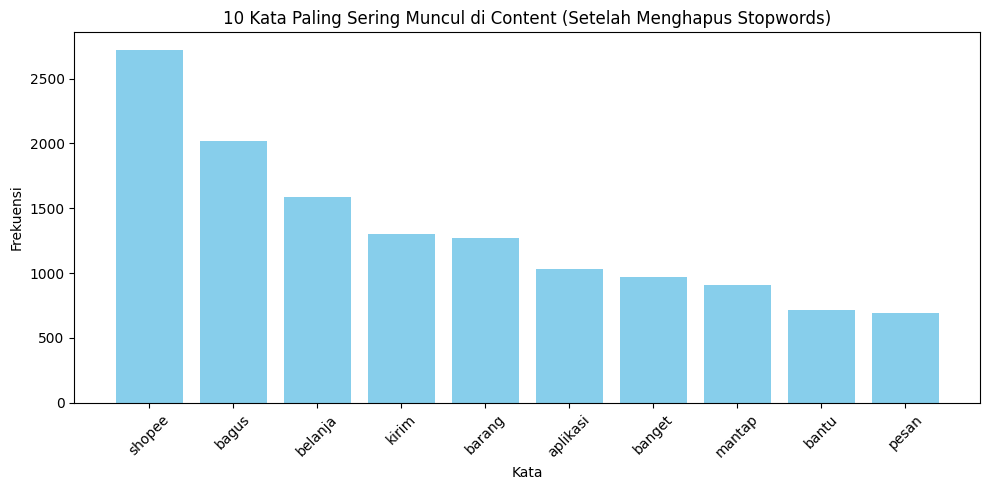

In [51]:
# Definisikan kata-kata yang ingin dihapus (bisa kamu tambah sesuai kebutuhan)
custom_stopwords = {'ya'}

# Gabungkan semua teks dalam kolom 'steming_data', hapus NaN
text = " ".join(df['steming_data'].dropna())  # Gabungkan teks & pastikan NaN terhapus

# Tokenisasi dan hapus kata-kata yang ada di stopwords
tokens = [word for word in text.split() if word.lower() not in STOPWORDS and word.lower() not in custom_stopwords]

# Hitung frekuensi kata
word_counts = Counter(tokens)

# Ambil 10 kata paling sering muncul
top_words = word_counts.most_common(10)
words, counts = zip(*top_words)  # Pisahkan kata dan jumlahnya

# Buat diagram batang
plt.figure(figsize=(10, 5))
plt.bar(words, counts, color='skyblue')
plt.xlabel("Kata")
plt.ylabel("Frekuensi")
plt.title("10 Kata Paling Sering Muncul di Content (Setelah Menghapus Stopwords)")
plt.xticks(rotation=45)  # Putar label agar lebih mudah dibaca
plt.tight_layout()  # Rapiin layout agar tidak terpotong
plt.show()


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   date              12000 non-null  object
 1   userName          12000 non-null  object
 2   content           12000 non-null  object
 3   cleaning          12000 non-null  object
 4   case_folding      12000 non-null  object
 5   normalisasi       12000 non-null  object
 6   tokenize          12000 non-null  object
 7   stopword removal  12000 non-null  object
 8   steming_data      12000 non-null  object
dtypes: object(9)
memory usage: 843.9+ KB


# Labeling - Metode INSET Lexicon-Based

Metode ini menggunakan kamus **INSET (Indonesia Sentiment Lexicon)** yang berisi daftar kata positif, negatif, dan netral.

### Langkah-langkah:
1. Tokenisasi teks
2. Bandingkan setiap kata dengan kamus INSET
3. Hitung skor:
   - Positif → +1
   - Negatif → -1
   - Netral/tidak ditemukan → 0
4. Tentukan label:
   - Skor > 0 → Positif
   - Skor < 0 → Negatif
   - Skor = 0 → Netral

### Kelebihan:
- Tidak perlu training
- Cepat dan mudah

### Kekurangan:
- Bergantung pada isi kamus
- Tidak mengenali konteks seperti sarkasme


In [54]:
# Fungsi untuk menentukan sentimen
def determine_sentiment(text):
    # Tokenisasi dan pastikan semua kata kecil (lowercase)
    words = text.lower().split()

    positive_count = sum(1 for word in words if word in positive_lexicon)
    negative_count = sum(1 for word in words if word in negative_lexicon)

    if positive_count > negative_count:
        return 'Positif'
    elif positive_count < negative_count:
        return 'Negatif'
    else:
        return 'Netral'

# Membaca lexicon positif dan negatif, memastikan file ada dan terbaca dengan baik
try:
    positive_lexicon = set(pd.read_csv('/content/positive.tsv', sep="\t", header=None)[0])
    negative_lexicon = set(pd.read_csv('/content/negative.tsv', sep="\t", header=None)[0])
except Exception as e:
    print(f"Error membaca file: {e}")
    positive_lexicon = set()
    negative_lexicon = set()

# Tentukan sentimen berdasarkan 'steming_data'
df['Sentiment'] = df['steming_data'].apply(determine_sentiment)

# Tampilkan hasil untuk 10 baris pertama
df.head(10)


,date,userName,content,cleaning,case_folding,normalisasi,tokenize,stopword removal,steming_data,Sentiment
0,2025-04-11 14:35:40,Pengguna Google,"Sejauh ini Alhamdulillah amanah, khususnya har...",Sejauh ini Alhamdulillah amanah khususnya harg...,sejauh ini alhamdulillah amanah khususnya harg...,sejauh ini alhamdulillah amanah khususnya harg...,"[sejauh, ini, alhamdulillah, amanah, khususnya...","[alhamdulillah, amanah, harga, barang, sesuai,...",alhamdulillah amanah harga barang sesuai kwali...,Positif
1,2025-04-11 14:35:26,Pengguna Google,ok,ok,ok,ok,[ok],[ok],ok,Positif
2,2025-04-11 14:32:42,Pengguna Google,pelayanan jasa kirim dan kebijakan 0%,pelayanan jasa kirim dan kebijakan,pelayanan jasa kirim dan kebijakan,pelayanan jasa kirim dan kebijakan,"[pelayanan, jasa, kirim, dan, kebijakan]","[pelayanan, jasa, kirim, kebijakan]",layan jasa kirim bijak,Positif
3,2025-04-11 14:31:52,Pengguna Google,good bgt,good bgt,good bgt,good banget,"[good, banget]","[good, banget]",good banget,Positif
4,2025-04-11 14:31:51,Pengguna Google,Shopee terpercaya,Shopee terpercaya,shopee terpercaya,shopee terpercaya,"[shopee, terpercaya]","[shopee, terpercaya]",shopee percaya,Positif
5,2025-04-11 14:31:15,Pengguna Google,memudahkan,memudahkan,memudahkan,memudahkan,[memudahkan],[memudahkan],mudah,Netral
6,2025-04-11 14:30:07,Pengguna Google,Tlong aplikasi shopee agar membuat nama&no hp ...,Tlong aplikasi shopee agar membuat namano hp k...,tlong aplikasi shopee agar membuat namano hp k...,tlong aplikasi shopee agar membuat namano hp k...,"[tlong, aplikasi, shopee, agar, membuat, naman...","[tlong, aplikasi, shopee, namano, hp, kurir, p...",tlong aplikasi shopee namano hp kurir antar ti...,Netral
7,2025-04-11 14:30:06,Pengguna Google,plis banget ini ma buat shopee yg terhormat to...,plis banget ini ma buat shopee yg terhormat to...,plis banget ini ma buat shopee yg terhormat to...,plis banget ini sama buat shopee yang terhorma...,"[plis, banget, ini, sama, buat, shopee, yang, ...","[plis, banget, shopee, terhormat, tolong, pesa...",plis banget shopee hormat tolong pesan custome...,Negatif
8,2025-04-11 14:29:24,Pengguna Google,tolong kenapa ya sebelum di update ongkir nya ...,tolong kenapa ya sebelum di update ongkir nya ...,tolong kenapa ya sebelum di update ongkir nya ...,tolong kenapa ya sebelum di update ongkir ya t...,"[tolong, kenapa, ya, sebelum, di, update, ongk...","[tolong, ya, update, ongkir, ya, kadang, free,...",tolong ya update ongkir ya kadang free ongkirt...,Positif
9,2025-04-11 14:29:12,Pengguna Google,MANTAP,MANTAP,mantap,mantap,[mantap],[mantap],mantap,Positif


<ipython-input-56-58ec377b7f54>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
<ipython-input-56-58ec377b7f54>:11: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  ax = sns.barplot(


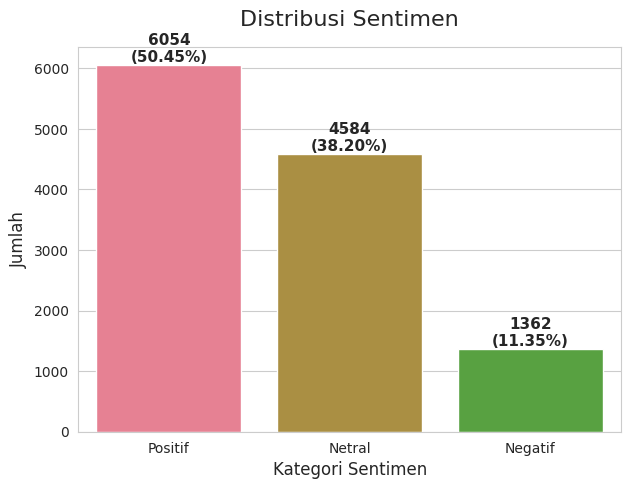

In [56]:
# Menghitung jumlah masing-masing sentimen
sentiment_count = df['Sentiment'].value_counts()

# Mengatur gaya seaborn
sns.set_style("whitegrid")

# Membuat figure dan axis
fig, ax = plt.subplots(figsize=(7, 5))  # Ukuran lebih besar untuk kejelasan

# Membuat barplot dengan warna yang lebih kontras
ax = sns.barplot(
    x=sentiment_count.index,
    y=sentiment_count.values,
    palette=sns.color_palette("husl")
)

# Menambahkan judul dan label sumbu
plt.title('Distribusi Sentimen', fontsize=16, pad=15)
plt.xlabel('Kategori Sentimen', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)

# Menghitung total data untuk persentase
total = sentiment_count.sum()

# Menampilkan angka dan persentase di atas batang
for i, count in enumerate(sentiment_count.values):
    percentage = f'{100 * count / total:.2f}%'
    ax.text(i, count + 0.5, f'{count}\n({percentage})', ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.show()


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   date              12000 non-null  object
 1   userName          12000 non-null  object
 2   content           12000 non-null  object
 3   cleaning          12000 non-null  object
 4   case_folding      12000 non-null  object
 5   normalisasi       12000 non-null  object
 6   tokenize          12000 non-null  object
 7   stopword removal  12000 non-null  object
 8   steming_data      12000 non-null  object
 9   Sentiment         12000 non-null  object
dtypes: object(10)
memory usage: 937.6+ KB


# Modeling

In [58]:
le = LabelEncoder()
df['label'] = le.fit_transform(df['Sentiment'])  # 0=Negatif, 1=Netral, 2=Positif

In [59]:
X_train, X_test, y_train, y_test = train_test_split(
    df['steming_data'], df['label'], test_size=0.2, random_state=42)

In [60]:
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train).toarray()
X_test_tfidf = tfidf.transform(X_test).toarray()

In [62]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

model_dl = Sequential([
    Dense(128, input_dim=X_train_tfidf.shape[1], activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])
model_dl.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print("🔧 Training Deep Learning...")
model_dl.fit(X_train_tfidf, y_train_cat, epochs=5, batch_size=32, validation_split=0.1, verbose=0,
             callbacks=[EarlyStopping(monitor='val_loss', patience=2)])

dl_preds = model_dl.predict(X_test_tfidf)
dl_preds_class = np.argmax(dl_preds, axis=1)
acc_dl = accuracy_score(y_test, dl_preds_class)
print(f"✅ Akurasi Deep Learning (TF-IDF): {acc_dl:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


🔧 Training Deep Learning...
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
✅ Akurasi Deep Learning (TF-IDF): 0.9387


In [63]:
print("🔧 Training SVM...")
model_svm = SVC(kernel='linear')
model_svm.fit(X_train_tfidf, y_train)
svm_preds = model_svm.predict(X_test_tfidf)
acc_svm = accuracy_score(y_test, svm_preds)
print(f"✅ Akurasi SVM (TF-IDF): {acc_svm:.4f}")

🔧 Training SVM...
✅ Akurasi SVM (TF-IDF): 0.9317


In [67]:
# Decision Tree (CountVectorizer, 70/30)
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(
    df['steming_data'], df['label'], test_size=0.3, random_state=42)

# Ekstraksi fitur pakai Count Vectorizer (BOW)
count_vectorizer = CountVectorizer()
X_train_bow = count_vectorizer.fit_transform(X_train_rf)
X_test_bow = count_vectorizer.transform(X_test_rf)

# Pelatihan Decision Tree
print("🔧 Training Decision Tree (CountVectorizer)...")
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train_bow, y_train_rf)

# Evaluasi
dt_preds = model_dt.predict(X_test_bow)
acc_dt = accuracy_score(y_test_rf, dt_preds)
print(f"✅ Akurasi Decision Tree (CountVectorizer - 70/30): {acc_dt:.4f}")

🔧 Training Decision Tree (CountVectorizer)...
✅ Akurasi Decision Tree (CountVectorizer - 70/30): 0.8722


In [68]:
print("\n🎯 Ringkasan Akurasi Model:")
print(f"- Deep Learning (TF-IDF)       : {acc_dl:.4f}")
print(f"- SVM (TF-IDF)                 : {acc_svm:.4f}")
print(f"- Decision Tree (countVectorizer-70/30): {acc_dt:.4f}")


🎯 Ringkasan Akurasi Model:
- Deep Learning (TF-IDF)       : 0.9387
- SVM (TF-IDF)                 : 0.9317
- Decision Tree (countVectorizer-70/30): 0.8722



🔍 Evaluasi Deep Learning (TF-IDF):
              precision    recall  f1-score   support

     Negatif       0.90      0.78      0.84       264
      Netral       0.90      0.96      0.93       917
     Positif       0.98      0.96      0.97      1219

    accuracy                           0.94      2400
   macro avg       0.93      0.90      0.91      2400
weighted avg       0.94      0.94      0.94      2400


🔍 Evaluasi SVM (TF-IDF):
              precision    recall  f1-score   support

     Negatif       0.85      0.78      0.81       264
      Netral       0.90      0.94      0.92       917
     Positif       0.97      0.96      0.97      1219

    accuracy                           0.93      2400
   macro avg       0.91      0.89      0.90      2400
weighted avg       0.93      0.93      0.93      2400


🔍 Evaluasi Decision Tree (CountVectorizer 70/30):
              precision    recall  f1-score   support

     Negatif       0.72      0.66      0.68       410
      Netral    

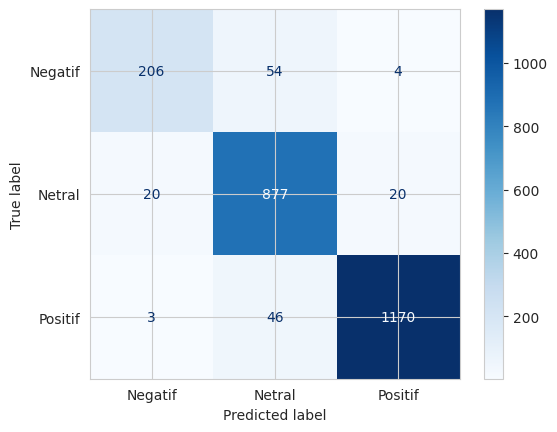

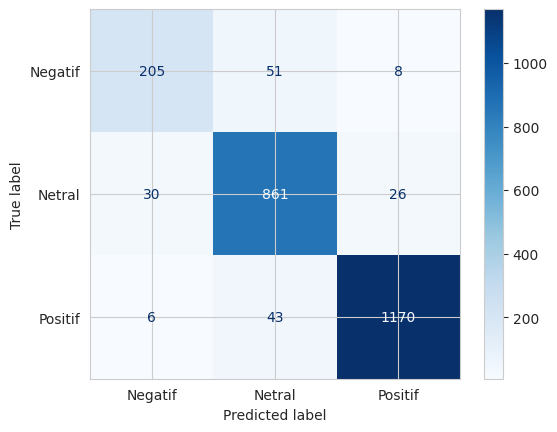

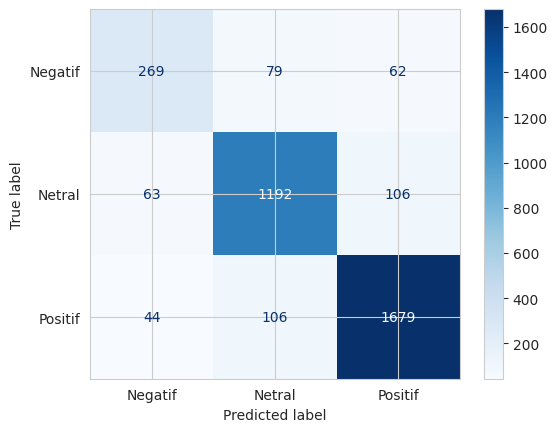

In [69]:
# --- 1. Deep Learning ---
print("\n🔍 Evaluasi Deep Learning (TF-IDF):")
cm_dl = confusion_matrix(y_test, dl_preds_class)
disp_dl = ConfusionMatrixDisplay(confusion_matrix=cm_dl, display_labels=le.classes_)
disp_dl.plot(cmap='Blues', values_format='d')
print(classification_report(y_test, dl_preds_class, target_names=le.classes_))

# --- 2. SVM ---
print("\n🔍 Evaluasi SVM (TF-IDF):")
cm_svm = confusion_matrix(y_test, svm_preds)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=le.classes_)
disp_svm.plot(cmap='Blues', values_format='d')
print(classification_report(y_test, svm_preds, target_names=le.classes_))

# --- 3. Decision Tree ---
print("\n🔍 Evaluasi Decision Tree (CountVectorizer 70/30):")
cm_dt = confusion_matrix(y_test_rf, dt_preds)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=le.classes_)
disp_dt.plot(cmap='Blues', values_format='d')
print(classification_report(y_test_rf, dt_preds, target_names=le.classes_))


In [77]:
# Meyimpan model
model_dl.save('model.h5')
print("💾 Model disimpan ke 'model_dl_tfidf.h5'")

💾 Model disimpan ke 'model_dl_tfidf.h5'


In [71]:
# Simpan TF-IDF Vectorizer
with open("tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(tfidf, f)

# Simpan Label Encoder
with open("label_encoder.pkl", "wb") as f:
    pickle.dump(le, f)


# Evaluasi Model: Deep Learning, SVM, Decision Tree

## Skema Percobaan

| **Model**        | **Ekstraksi Fitur** | **Pembagian Data** | **Algoritma**              |
|------------------|---------------------|--------------------|----------------------------|
| Percobaan 1      | TF-IDF              | 80/20              | Deep Learning (DL)         |
| Percobaan 2      | TF-IDF              | 80/20              | SVM                        |
| Percobaan 3      | CountVectorizer     | 70/30              | Decision Tree              |

---

## 1. Deep Learning (TF-IDF)

- **Akurasi:** 94%
- **Precision, recall, f1-score** sangat baik, terutama untuk **Positif** dan **Netral**.
- **Negatif:** recall sedikit lebih rendah tetapi tetap baik.

---

## 2. SVM (TF-IDF)

- **Akurasi:** 92%
- **Precision dan recall** sangat baik untuk **Positif**.
- **Negatif:** recall sedikit lebih rendah dibandingkan kelas lainnya.

---

## 3. Decision Tree (CountVectorizer)

- **Akurasi:** 86%
- Kinerja terbaik pada **Positif** dan **Netral**.
- **Negatif:** recall rendah (59%), memerlukan perbaikan.

---

## Ringkasan Akurasi

| Model                        | Akurasi (%) |
|------------------------------|-------------|
| Deep Learning (TF-IDF)        | 94%         |
| SVM (TF-IDF)                  | 92%         |
| Decision Tree (CountVectorizer) | 86%        |

---

## Kesimpulan

- **Deep Learning (TF-IDF)** memiliki akurasi tertinggi dan performa sangat baik.
- **SVM (TF-IDF)** masih bagus dengan akurasi 92%, tetapi sedikit lebih rendah daripada DL.
- **Decision Tree** memiliki akurasi lebih rendah dan perlu perbaikan dalam mendeteksi kelas Negatif.


In [72]:
sentimen_negatif = df[df['Sentiment'] == 'Negatif']['steming_data'].str.cat(sep=' ')
sentimen_positif = df[df['Sentiment'] == 'Positif']['steming_data'].str.cat(sep=' ')
sentimen_netral = df[df['Sentiment'] == 'Netral']['steming_data'].str.cat(sep=' ')

In [73]:
def create_worldcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")  # Hilangkan sumbu
    plt.title(title, fontsize=16, pad=15)
    plt.show()

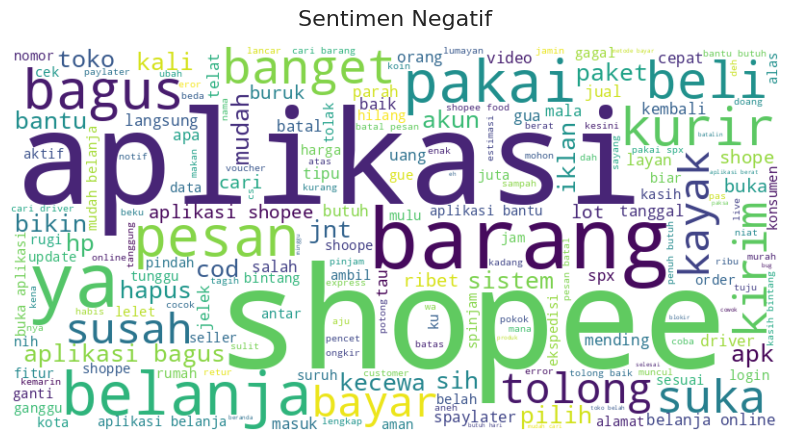

In [74]:
create_worldcloud(sentimen_negatif, "Sentimen Negatif")

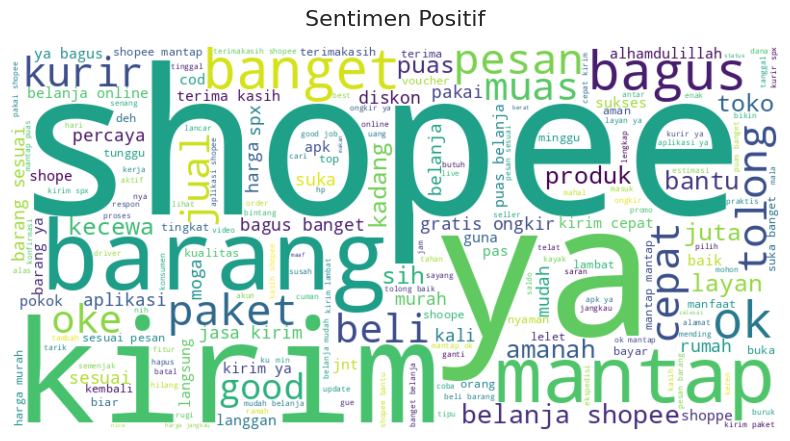

In [75]:
create_worldcloud(sentimen_positif, "Sentimen Positif")

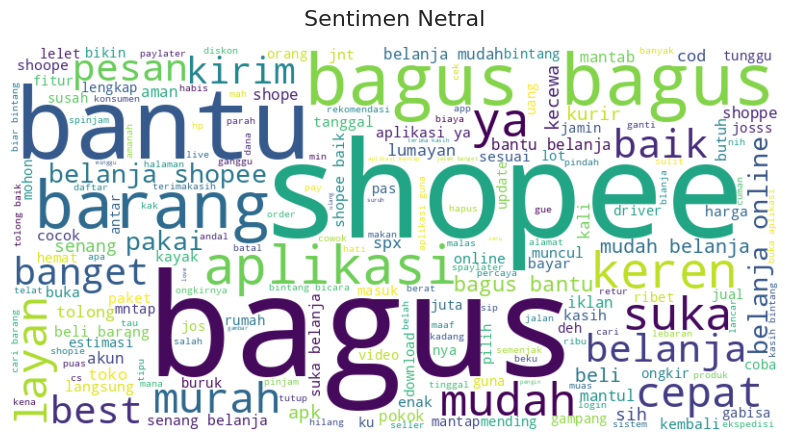

In [76]:
create_worldcloud(sentimen_netral, "Sentimen Netral")